In [1]:
#!/usr/bin/env python

In [2]:
import numpy as np
from numpy import ones
from numpy import array
import matplotlib.pyplot as plt
from numpy import mean
import random

In [3]:
Φ = array([	[1,1],
			[2,1],
			[2,1],
			[3,1]])

In [4]:
n = Φ.shape[0]

In [5]:
y = array([	[1],
			[1],
			[2],
			[2]])

The function we are trying to minimize is<br>
$$\min_w \; f(x) = \frac{1}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i)^2$$

In [6]:
def f(w):
	fₒ = 0						# function output
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
#
	return ((1/n)*fₒ).item()
#

The equation for the gradient is <br>
$$f'(x) = \frac{2}{n} \; \sum_i^n \; (w^{\top} \phi(x_i) - y_i) \phi(x_i)$$

In [7]:
w = array([[0],[1]]) 
η = 0.01

In [8]:
def fᑊ(w):	# Gradient for GD
	ᐁf = np.zeros((2,1))
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		ᐁf += (w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ
	return (2/n)*ᐁf

In [9]:
gd_list = []
for i in range(1000):
	w = w - η*fᑊ(w)				# gradient descent update w
	#w = w - η*fˢᑊ(w)				
	gd_list.append(f(w))

Solving with SGD

In [10]:
wˢ = array([[0],[1]]) 
η = 0.0005

In [11]:
def fˢᑊ(w):	# Gradient for SGD
	# randomly pick a sample
	ϕᵢ, yᵢ = random.choice(list(zip(Φ, y.ravel())))
	ϕᵢ = np.reshape(ϕᵢ, (2,1))
	return 2*(w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ

In [12]:
sgd_list = []
for i in range(1000):
	wˢ = wˢ - η*fˢᑊ(wˢ)
	sgd_list.append(f(wˢ))

In [13]:
print('Best GD w = \n', w)
print('Best SGD w = \n', wˢ)
print('GD Predictions: \n', Φ.dot(w))
print('SGD Predictions: \n', Φ.dot(wˢ))

Best GD w = 
 [[0.45703505]
 [0.59468478]]
Best SGD w = 
 [[0.25642217]
 [1.05419108]]
GD Predictions: 
 [[1.05171984]
 [1.50875489]
 [1.50875489]
 [1.96578995]]
SGD Predictions: 
 [[1.31061325]
 [1.56703541]
 [1.56703541]
 [1.82345758]]


Get the points for the best fit line

In [14]:
xp = np.linspace(0,4,10)
fₓ = w[0]*xp + w[1]
fˢ = wˢ[0]*xp + wˢ[1]

Draw the best fit line and the data out

In [15]:
plt.figure(figsize=(6,6))
plt.subplot(221)
plt.scatter(Φ[:,0], y, color='red')
plt.plot(xp, fₓ)
plt.title('GD Result')
plt.xlim(0,3)	# Show this region along x-axis
plt.ylim(0,3)	# Show this region along y-axis
#
# Display the error over GD
plt.subplot(222)
plt.plot(gd_list)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.ylim(0,0.5)	# Show this region along y-axis

(0.0, 0.5)

Draw the best fit line and the data out

In [16]:
plt.subplot(223)
plt.scatter(Φ[:,0], y, color='red')
plt.plot(xp, fˢ)
plt.title('SGD Result')
plt.xlim(0,3)	# Show this region along x-axis
plt.ylim(0,3)	# Show this region along y-axis
#
# Display the error over SGD
plt.subplot(224)
plt.plot(sgd_list)
plt.title('MSE over SGD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.ylim(0,0.5)	# Show this region along y-axis

(0.0, 0.5)

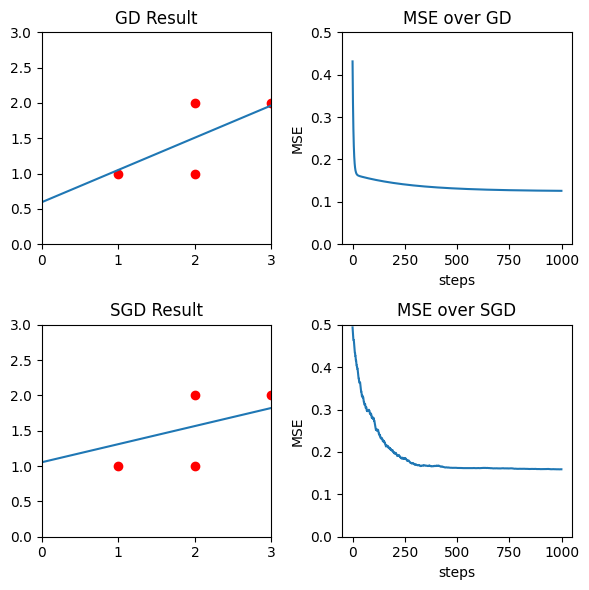

In [17]:
plt.tight_layout()
plt.show()